# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# 2.1 - Load the `./data/ForeignGifts_edu.csv` dataset.
df = pd.read_csv("./data/ForeignGifts_edu.csv")

df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


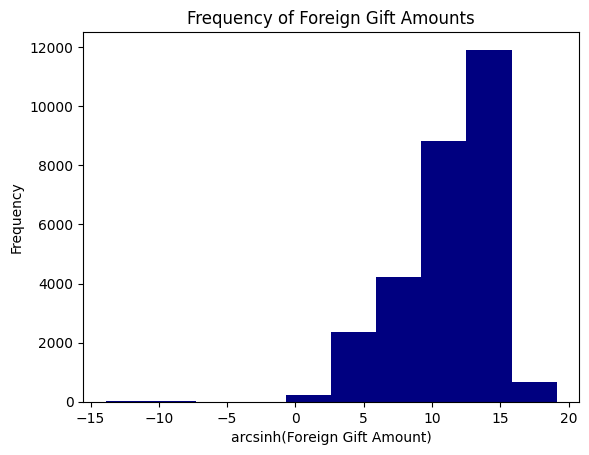

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


In [502]:
# 2.2 - For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
plt.figure()
plt.hist(np.arcsinh(df["Foreign Gift Amount"]), color = "navy")
plt.xlabel("arcsinh(Foreign Gift Amount)")
plt.ylabel("Frequency")
plt.title("Frequency of Foreign Gift Amounts")
plt.show()

print(df["Foreign Gift Amount"].describe())

# The distribution of foreign gift amounts is skewed right, with a mean of $588,323, and a median of $94,615

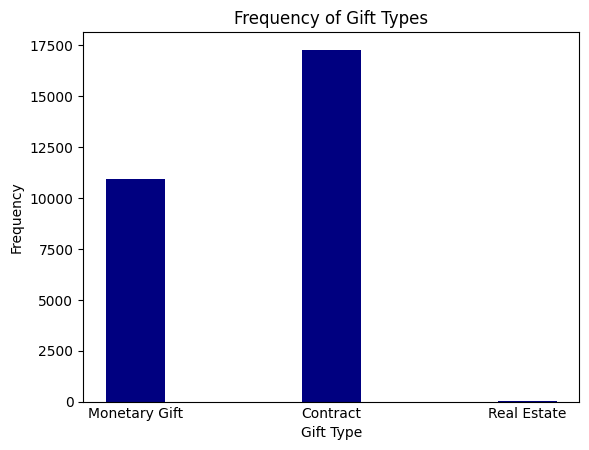

Proportion Contracts: 0.6121 

Proportion Real Estate: 0.38751 

Proportion Monetary Gifts: 0.00039 



In [503]:
# 2.3 - For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
contract = df["Gift Type"].value_counts(dropna = False)["Contract"]
monetary = df["Gift Type"].value_counts(dropna = False)["Monetary Gift"]
real_estate = df["Gift Type"].value_counts(dropna = False)["Real Estate"]

plt.figure()
plt.bar(df["Gift Type"].unique(), [monetary, contract, real_estate], width = 0.3, color = "navy")
plt.xlabel("Gift Type")
plt.ylabel("Frequency")
plt.title("Frequency of Gift Types")
plt.gca().tick_params(axis = 'x', length = 0)
plt.show()

print("Proportion Contracts:", round(contract/df.shape[0],5), "\n")
print("Proportion Real Estate:", round(monetary/df.shape[0],5), "\n")
print("Proportion Monetary Gifts:", round(real_estate/df.shape[0],5), "\n")

/home/mgh2xx/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


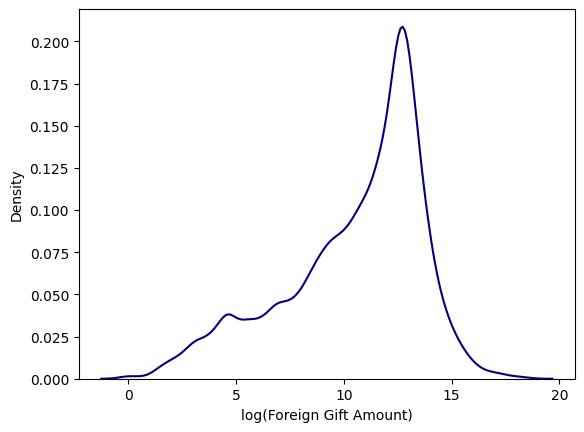

/home/mgh2xx/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


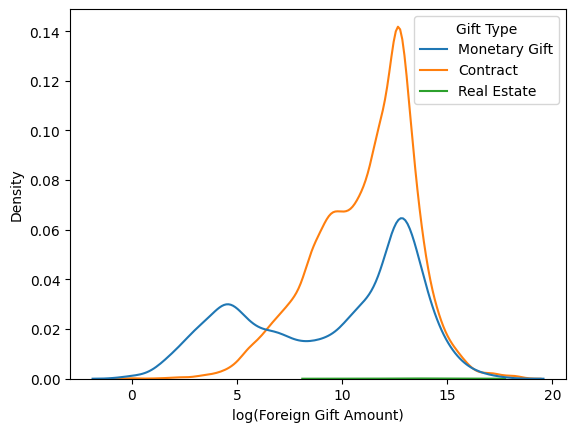

In [504]:
# 2.4 - Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
plt.figure()
sns.kdeplot(np.log(df["Foreign Gift Amount"]), color = "navy")
plt.xlabel("log(Foreign Gift Amount)")
plt.show()

plt.figure()
log_df = df.copy()
log_df["Foreign Gift Amount"] = np.log(log_df["Foreign Gift Amount"])
sns.kdeplot(data = log_df, x = "Foreign Gift Amount", hue = "Gift Type").set(xlabel = "log(Foreign Gift Amount)")
plt.show()

# At lower foreign gift amounts, monetary gifts are more prevalent than contracts, 
# but at around log(FGA) = 7 the contract density grows much larger than monetary 
# gifts until around log(FGA) = 15, where they both approach 0

In [505]:
# 2.5 - What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
top_15_ngifts = df.groupby("Country of Giftor").count().reset_index().sort_values(by = "ID", ascending = False).head(15)

print("Top 15 Countries in terms of number of gifts:")
for i, country in zip(range(1, len(top_15_ngifts) + 1), top_15_ngifts["Country of Giftor"].unique()):
    print(f"{i}) {country}")

Top 15 Countries in terms of number of gifts:
1) ENGLAND
2) CHINA
3) CANADA
4) JAPAN
5) SWITZERLAND
6) SAUDI ARABIA
7) FRANCE
8) GERMANY
9) HONG KONG
10) SOUTH KOREA
11) QATAR
12) THE NETHERLANDS
13) KOREA
14) INDIA
15) TAIWAN


In [506]:
top_15_amount = df.groupby("Country of Giftor").sum().reset_index().sort_values(by = "Foreign Gift Amount", ascending = False).head(15)

print("Top 15 Countries in terms of amount given:")
for i, country in zip(range(1, len(top_15_amount) + 1), top_15_amount["Country of Giftor"].unique()):
    print(f"{i}) {country}")

Top 15 Countries in terms of amount given:
1) QATAR
2) ENGLAND
3) CHINA
4) SAUDI ARABIA
5) BERMUDA
6) CANADA
7) HONG KONG
8) JAPAN
9) SWITZERLAND
10) INDIA
11) GERMANY
12) UNITED ARAB EMIRATES
13) FRANCE
14) SINGAPORE
15) AUSTRALIA


Top 15 institutions in terms of total money received:
1) Carnegie Mellon University
2) Cornell University
3) Harvard University
4) Massachusetts Institute of Technology
5) Yale University
6) Texas A&M University
7) Johns Hopkins University
8) Northwestern University
9) Georgetown University
10) University of Chicago (The)
11) University of Colorado Boulder
12) Duke University
13) Brigham Young University
14) Stanford University
15) University of Texas MD Anderson Cancer Center


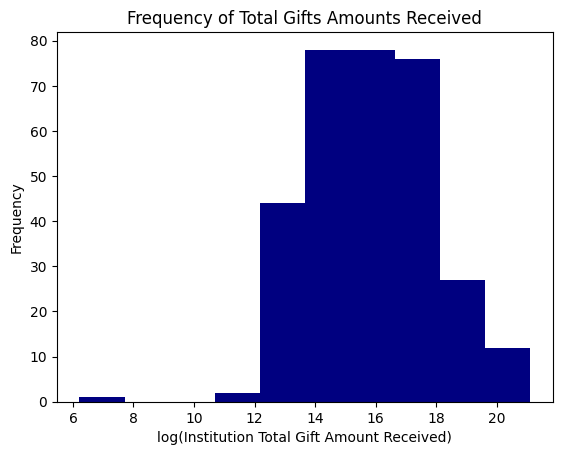

In [507]:
# 2.6 - What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
amount_by_institution = df.groupby("Institution Name").sum().reset_index()
top_15_amount_by_institution = amount_by_institution.sort_values(by = "Foreign Gift Amount", ascending = False).head(15)
print("Top 15 institutions in terms of total money received:")
for i, institution in zip(range(1,len(top_15_amount_by_institution) + 1), top_15_amount_by_institution["Institution Name"].unique()):
    print(f"{i}) {institution}")
plt.hist(np.log(amount_by_institution["Foreign Gift Amount"]), color = "navy")
plt.xlabel("log(Institution Total Gift Amount Received)")
plt.ylabel("Frequency")
plt.title("Frequency of Total Gifts Amounts Received")
plt.show()

In [508]:
# 2.7 - Which giftors provide the most money, in total?
giftors = df.groupby("Giftor Name").sum().reset_index()
giftors_sorted = giftors.sort_values(by = "Foreign Gift Amount", ascending = False)
top_15_giftors = giftors_sorted.head(15)

print("The following giftors provide the most total money:")
for i, giftor in zip(range(1, len(top_15_giftors) + 1), top_15_giftors["Giftor Name"]):
    print(f"{i}) {giftor}")

The following giftors provide the most total money:
1) Qatar Foundation
2) Qatar Foundation/Qatar National Res
3) Qatar Foundation for Education
4) Anonymous
5) Saudi Arabian Cultural Mission
6) HCL
7) Church of Jesus Christ of LDS
8) Emirates Institute for Advanced Sc
9) QIC
10) Anonymous #9
11) Qatar National Research Fund
12) Government of Saudi Arabia
13) Contracting Party
14) CMKL University
15) Royal Embassy of Saudi Arabia


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [509]:
# 4.1 - Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? 
# Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? 
# Explain clearly how these data need to be cleaned.

df = pd.read_csv("./data/drilling_rigs.csv")

print(f"{df.shape[0]} observations, and {df.shape[1]} variables")

df.head()

623 observations, and 10 variables


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [510]:
# 4.1 continued
columns = df.columns
print("Before Cleaning:\n")
for column in columns[1:]:
    print(column, ":", df[column].apply(type).unique())

# The variables which have Not Available need to be coerced, as they come in as strings
# They can be cleaned by converting the columns which are meant to have numeric values into numerics using pd.to_numeric
# This will turn the "Not Available"s into NaN
for column in columns[1:]:
    df[column] = pd.to_numeric(df[column], errors = "coerce")

print("\n\nAfter Cleaning:\n")
for column in columns[1:]:
    print(column, ":", df[column].apply(type).unique())

df.head()

Before Cleaning:

Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs) : [<class 'int'>]
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs) : [<class 'int'>]
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs) : [<class 'str'>]
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs) : [<class 'str'>]
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs) : [<class 'str'>]
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs) : [<class 'str'>]
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs) : [<class 'str'>]
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs) : [<class 'int'>]
Active Well Service Rig Count (Number of Rigs) : [<class 'str'>]


After Cleaning:

Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs) : [<class 'int'>]
Crude Oil and Natural Gas Rotary Rigs

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0


In [511]:
# 4.2 - To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.

df['Time'] = pd.to_datetime(df['Month'], format='mixed')
df.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),Time
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0,1973-01-01
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0,1973-02-01
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0,1973-03-01
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0,1973-04-01
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0,1973-05-01


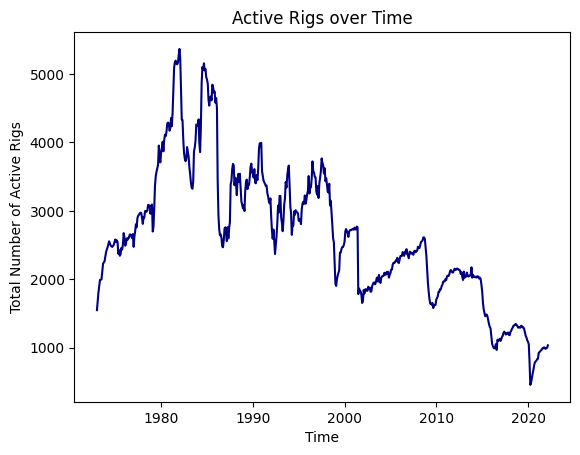

In [ ]:
# 4.3 - Let's look at `Active Well Service Rig Count (Number of Rigs)`, 
# which is the total number of rigs over time. Make a line plot of this time series. 
# Describe what you see.

plt.figure()
plt.plot(df["Time"], df["Active Well Service Rig Count (Number of Rigs)"], color = "navy")
plt.xlabel("Time")
plt.ylabel("Total Number of Active Rigs")
plt.title("Active Rigs over Time")
plt.show()

# I see a steep upward rise until the early 1980s, at which point the number of
# active rigs begins to steadily decrease, with sharp increases/decreases occurring
# within the steady decrease, likely due to changes in Presidents,
# and with that, changes in policy on rigs

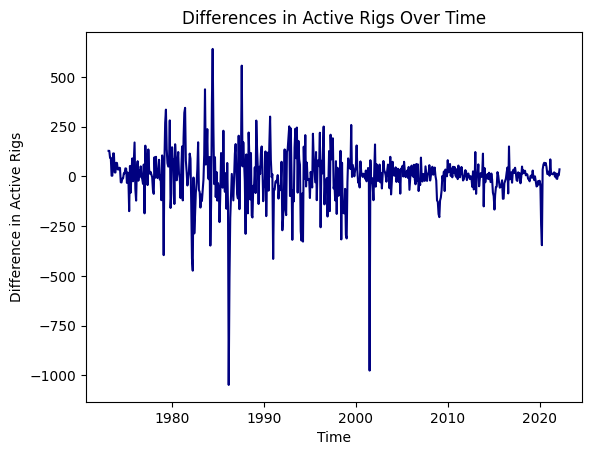

In [513]:
# 4.4 - Instead of levels, we want to look at change over time. 
# Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. 
# Describe what you see.

plt.plot(df["Time"], df["Active Well Service Rig Count (Number of Rigs)"].diff(), color = "navy")
plt.xlabel("Time")
plt.ylabel("Difference in Active Rigs")
plt.title("Differences in Active Rigs Over Time")
plt.show()

# I see the magnitude of changes decreasing over time, 
# with a couple significant increases/decreases happening in very short periods of time

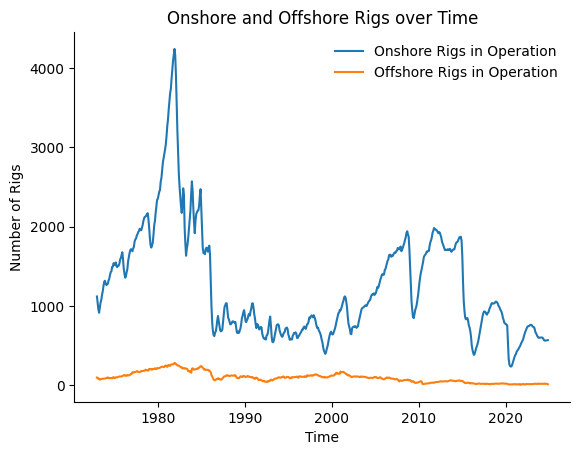

In [519]:
# 4.5 - The first two columns are the number of onshore and offshore rigs, respectively. 
# Melt these columns and plot the resulting series.
df = df.rename(columns = {'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)' : 'Onshore Rigs in Operation', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)' : 'Offshore Rigs in Operation'})
melted_df = df.melt(id_vars = ['Time'], 
                    value_vars = ["Onshore Rigs in Operation", "Offshore Rigs in Operation"])

plt.figure()
fig = sns.lineplot(data = melted_df, x = 'Time', y = 'value', hue = 'variable')
plt.legend(loc = "upper right", bbox_to_anchor = (1, 1), frameon = False)
sns.despine(top = True, right = True)
fig.set(title = "Onshore and Offshore Rigs over Time", ylabel = "Number of Rigs")
plt.show()